# Esercitazione 4: dinamica molecolare nell'insieme microcanonico

**Simulazioni di dinamica molecolare**

In meccanica statistica, alcuni problemi sono risolvibili in modo esatto. Questo significa che una descrizione completa delle proprietà microscopiche di un sistema, come l'Hamiltoniana di un modello ideale come il gas perfetto o il cristallo di Einstein, porta direttamente a risultati interessanti o proprietà macroscopiche, come l'equazione di stato $ pV = Nk_BT $. Tuttavia, questi problemi risolvibili in modo esatto sono pochi; ad esempio, il modello di Ising bidimensionale è un famoso esempio. Altri problemi, sebbene non esattamente risolvibili, possono essere analizzati efficacemente mediante approssimazioni dirette. Tuttavia, molti schemi di approssimazione "diretti" falliscono quando applicati a sistemi complessi, e in alcuni casi non è chiaro come iniziare a costruire una teoria approssimativa in modo ragionevole.

Le simulazioni al computer svolgono un ruolo importante nel fornire risultati essenzialmente esatti per i problemi in meccanica statistica. Queste simulazioni sono un test delle teorie e hanno aiutato a distinguere tra approcci ben fondati e idee plausibili ma meno efficaci. I risultati delle simulazioni possono anche essere confrontati con quelli degli esperimenti reali, fornendo così un test del modello sottostante. Maggiore è la complessità e l'interesse del problema, più è importante avere a disposizione risultati esatti per valutare metodi di approssimazione esistenti e per suggerire nuove vie di ricerca.

Infine, se il modello è accurato, le simulazioni possono fornire spunti per l'esperimentatore e aiutare nell'interpretazione dei risultati. Queste tecniche sono spesso chiamate "esperimenti al computer" e possono essere utilizzate per studiare una vasta gamma di fenomeni fisici, dalla scala molecolare a quella galattica. Tuttavia, è importante ricordare che le simulazioni forniscono solo numeri e non una comprensione diretta dei fenomeni studiati. Come negli esperimenti reali, è necessario estrarre attentamente le informazioni utili dai risultati delle simulazioni, poiché non forniscono direttamente relazioni teoriche. Pertanto, è rischioso affermare che le simulazioni possano dimostrare qualcosa, anche se a volte siamo tentati di farlo.

La dinamica molecolare (MD) è la scienza di simulare il comportamento dipendente dal tempo di un sistema di particelle. L'evoluzione temporale dell'insieme di atomi interagenti è seguita integrando le loro equazioni del moto con condizioni al contorno appropriate per la geometria o la simmetria del sistema. La dinamica molecolare genera informazioni a livello microscopico, che sono: posizioni e velocità atomiche. Per calcolare il comportamento microscopico di un sistema dalle leggi della meccanica classica, la MD richiede, come input, una descrizione del potenziale di interazione. La qualità dei risultati di una simulazione di MD dipende dall'accuratezza della descrizione del potenziale di interazione tra particelle.

$$
\dot{q}_i = \frac{\partial H(q_i, p_i)}{\partial p_i} \quad \dot{p}_i = -\frac{\partial H(q_i, p_i)}{\partial q_i} \quad i = 1,2,...,3N
$$

Quindi, la tecnica della MD agisce come un microscopio computazionale. Queste informazioni microscopiche sono quindi convertite in osservabili macroscopiche come pressione, temperatura, capacità termica e tensore degli sforzi, ecc., utilizzando la meccanica statistica. Quando eseguiamo un vero esperimento, prepariamo un campione del materiale, colleghiamo questo campione a uno strumento di misura e misuriamo la proprietà di interesse durante un certo intervallo di tempo. Le nostre misurazioni sono soggette a rumore statistico, maggiore è il tempo medio, più precisa diventa la nostra misurazione. Le simulazioni di dinamica molecolare sono in molti aspetti molto simili agli esperimenti reali. In effetti, alcuni dei più comuni errori che possono essere commessi durante un esperimento al computer sono molto simili agli errori che possono essere commessi in esperimenti reali (ad esempio, il campione non è preparato correttamente, la misurazione è troppo breve, il sistema subisce una modifica irreversibile durante l'esperimento, ecc.). Queste situazioni, tuttavia, non rappresentano necessariamente un "errore": le simulazioni di dinamica molecolare possono essere utilizzate, infatti, per studiare sistemi fuori equilibrio, non solo proprietà statistiche di equilibrio.


La **conservazione dell'energia** è un criterio importante, ma in realtà dovremmo distinguere due tipi di conservazione dell'energia, ovvero, a breve e lungo termine. Gli algoritmi sofisticati di ordine superiore tendono ad avere una buona conservazione dell'energia per brevi periodi. Tuttavia, spesso presentano l'inconveniente che l'energia totale subisce una deriva nel lungo periodo. **La conservazione dell'energia si degrada all'aumentare del passo temporale** e quindi tutte le simulazioni implicano un **compromesso tra economia e precisione**: un buon algoritmo permette di utilizzare un ampio passo temporale pur preservando una conservazione dell'energia accettabile. Altri fattori che determinano le proprietà di conservazione dell'energia sono la forma delle curve di energia potenziale e le velocità delle particelle tipiche. Pertanto, sono utilizzati passaggi temporali più brevi a temperature elevate, per molecole leggere e per funzioni potenziali che variano rapidamente. 

L'**energia potenziale è una funzione delle posizioni atomiche (3N) di tutti gli atomi nel sistema**. A causa della natura complicata di questa funzione, non esiste una soluzione analitica alle equazioni del moto e queste equazioni devono essere risolte numericamente. Sono stati sviluppati numerosi algoritmi numerici per integrare le equazioni del moto. Ne elenchiamo alcuni qui.
- Algoritmo di Verlet
- Algoritmo di Leap-frog
- Velocity Verlet
- Algoritmo di Beeman
- Integratori reversibili simplettic

 Nella scelta dell'algoritmo da utilizzare, si considerano i seguenti criteri:
- L'algoritmo dovrebbe conservare energia e momento ed essere reversibile. Quando $dt$ tende a zero, il sistema dovrebbe tornare allo stato originale.
- Dovrebbe essere computazionalmente efficiente.
- Dovrebbe consentire un lungo passo temporale per l'integrazione.
- Solo una valutazione della forza per passo temporale (importante per potenziali complessi)



## Algoritmo di Verlet

Il metodo delle differenze finite più ampiamente usato è un algoritmo di espansione di Taylor di terzo ordine utilizzato per la prima volta da Verlet (1967) e conosciuto come il metodo di Verlet. Deriva dalle due espansioni di Taylor sommando le equazioni sopra eliminate i termini di ordine dispari. Si noti che il vettore posizione $r$ al tempo $t+dt$ è calcolato dal vettore posizione al tempo $t$ e $t-dt$, questo rende l'algoritmo di Verlet un **metodo a due passi. Pertanto, non è autoiniziale, le posizioni iniziali r(0) e le velocità v(0) non sono sufficienti per iniziare un calcolo**. Un'altra osservazione riguardo all'algoritmo di Verlet è che è correttamente centrato, cioè r(t-dt) e r(t+dt) svolgono ruoli simmetrici rendendolo reversibile nel tempo.

$$ \mathbf{r}(t + \delta t) = \mathbf{r}(t) + \delta t \mathbf{v}(t) + \frac{1}{2} \delta t^2 \mathbf{a}(t) + \frac{1}{3!} \delta t^3 \dot{\mathbf{a}}(t) + O(\delta t^4) $$

$$ \mathbf{r}(t - \delta t) = \mathbf{r}(t) - \delta t \mathbf{v}(t) + \frac{1}{2} \delta t^2 \mathbf{a}(t) - \frac{1}{3!} \delta t^3 \dot{\mathbf{a}}(t) + O(\delta t^4) $$

\begin{eqnarray} \mathbf{r}(t + \delta t) + \mathbf{r}(t - \delta t) = 2\mathbf{r}(t) + \delta t^2 \mathbf{a}(t) + O(\delta t^4)\\ \Rightarrow \mathbf{r}(t + \delta t) \approx 2\mathbf{r}(t) - \mathbf{r}(t - \delta t) + \delta t^2 \mathbf{a}(t) \end{eqnarray}

L'algoritmo di Verlet non utilizza la velocità per calcolare la nuova posizione. Tuttavia, si può derivare la velocità dalla conoscenza della traiettoria, usando la seguente espressione per la velocità è accurata solo all'ordine $dt^2$. Quindi, nella sua forma originale, tratta la velocità come meno importante delle posizioni. Lo schema generale di questo algoritmo è illustrato in questa figura:

$$ \mathbf{v}(t) = \frac{\mathbf{r}(t + \delta t) - \mathbf{r}(t - \delta t)}{2 \delta t} + O(\delta t^2) \approx \frac{\mathbf{r}(t + \delta t) - \mathbf{r}(t - \delta t)}{2 \delta t} $$

$$ \mathbf{r}(t + \delta t) - \mathbf{r}(t - \delta t) = 2 \delta t \mathbf{v}(t) + O(\delta t^3) $$

Storia della Dinamica Molecolare

- 1957 (Alder & Wainwright) transizione di fase liquido-solido (UNIVAC)
- 1960 (Gibson et al.) studio della creazione di difetti sotto danni da radiazioni con potenziale continuo (IBM 704)
- 1964 (Rahman) studio dell'Argon liquido con un potenziale di Lennard-Jones (CDC 3600)
- 1967 (Verlet) diagramma di fase dell'Argon con potenziale di Lennard-Jones (UNIVAC, IBM704, CDC3600)


Le simulazioni al computer vengono di solito eseguite su un piccolo numero di molecole, $N < 105$: le dimensioni del sistema sono limitate dalla memoria disponibile sul computer ospite e, più crucialmente, dalla velocità di esecuzione del programma. Il tempo richiesto per un doppio loop utilizzato per valutare le forze (a coppie) o l'energia potenziale è proporzionale a $N^2$. Tecniche speciali possono ridurre questa dipendenza a $O(N)$, per sistemi molto grandi; chiaramente, sistemi più piccoli saranno sempre meno costosi. Se siamo interessati alle proprietà di una goccia di liquido molto piccola o a un microcristallo, allora la simulazione sarà diretta. Le forze coesive tra le molecole possono essere sufficienti a mantenere unito il sistema durante il corso di una simulazione. Altrimenti il nostro insieme di $N$ molecole può essere confinato da un potenziale che rappresenta un contenitore, che impedisce loro di allontanarsi. Tali disposizioni, tuttavia, non sono soddisfacenti per la simulazione di sistemi bulk.

Un ostacolo importante a tale simulazione è la grande frazione di molecole che giacciono sulla superficie di qualsiasi piccolo campione; per $103$ molecole disposte in un cubo $10x10x10$, ben $488$ molecole appaiono sulle facce del cubo. Che il cubo sia o meno circondato da un muro contenitore, le molecole sulla superficie subiranno forze del tutto diverse dalle molecole nel bulk.

**Il problema degli effetti superficiali può essere superato implementando condizioni di bordo periodiche**: il cubo cubico è replicato in tutto lo spazio per formare un reticolo infinito. Nel corso della simulazione, quando una molecola si muove nella scatola originale, la sua immagine periodica in ciascuna delle scatole circostanti si muove esattamente allo stesso modo. Pertanto, quando una molecola lascia la scatola centrale, una delle sue immagini entrerà attraverso la faccia opposta. Non ci sono muri al limite della scatola centrale, e nessuna molecola di superficie. Questa scatola forma semplicemente un sistema di assi conveniente per misurare le coordinate delle N molecole.

Una versione bidimensionale di un tale sistema periodico è mostrata nella figura. Le scatole duplicate sono etichettate A, B, C, ecc. in modo arbitrario. Mentre la particella 1 si muove attraverso un confine, le sue immagini, 1A, 1B, ecc. (dove l'apice specifica in quale scatola si trova l'immagine) si muovono attraverso i rispettivi confini.

$$ Pbc(\mathbf{r}) = \mathbf{r} - \text{box} \times \text{rint}(\mathbf{r}/\text{box}) $$

È usato anche per le distanze (immagine minima): se $d > 0.5 \times \text{box}$ o $<-0.5 \times \text{box}$ l'algoritmo restituisce la distanza con l'immagine più vicina!



## Energia potenziale

<img src="md.png">

Ora dobbiamo affrontare la questione del calcolo delle proprietà dei sistemi soggetti a condizioni di bordo periodiche. Il cuore dei programmi di simulazione coinvolge il calcolo dell'energia potenziale di una configurazione particolare. Con l'algoritmo Metropolis Monte Carlo (MC) (vedremo che) l'energia potenziale V fa parte della densità di probabilità configurazionale che desideriamo campionare (ad es. $p=exp(-bV)/Z$ per l'insieme canonico). Con il metodo della Dinamica Molecolare (MD), dove si risolvono le equazioni del moto di Newton per un insieme di N particelle, è necessaria l'energia potenziale per calcolare le forze che agiscono su tali particelle ($F=-\nabla V$). Consideriamo come calcoleremmo la forza sulla molecola 1, o quelle contribuzioni all'energia potenziale che coinvolgono la molecola 1, assumendo additività a coppie.

Dobbiamo includere le interazioni tra la molecola 1 e ogni altra molecola i nella scatola di simulazione. Ci sono N-1 termini in questa somma. Tuttavia, in principio, dobbiamo anche includere tutte le interazioni tra la molecola 1 e le immagini iA, iB, ecc. situate nelle scatole circostanti. Questo è un numero infinito di termini e naturalmente è impossibile calcolarlo in pratica. Per una funzione di energia potenziale a breve raggio, possiamo limitare questa somma facendo un'approssimazione: consideriamo la molecola 1 come se fosse al centro di una regione che ha le stesse dimensioni e la stessa forma della scatola di simulazione di base. La molecola 1 interagisce con tutte le molecole i cui centri si trovano all'interno di questa regione, cioè con le immagini periodiche più vicine delle altre N-1 molecole. Questo si chiama "**convenzione dell'immagine minima**": ad esempio, nella figura la molecola 1 interagisce con le molecole 2,3E, 4E e 5C.

Nella convenzione dell'immagine minima, quindi, il calcolo dell'energia potenziale dovuto alle interazioni additivo-a-coppie coinvolge N(N-1)/2 termini. Un'ulteriore approssimazione migliora significativamente questa situazione. Il contributo maggiore all'energia potenziale e alle forze proviene dai vicini vicini alla molecola di interesse, e per forze a corto raggio applichiamo normalmente un cutoff sferico

Questo significa impostare il potenziale di coppia $v(r)$ a zero per $r > r_c$, dove $r_c$ è la distanza di cutoff. Il cerchio tratteggiato nella figura rappresenta un cutoff e in questo caso le molecole 2 e 4E contribuiscono alla forza sulla 1, poiché i loro centri giacciono all'interno del cutoff, mentre le molecole 3E e 5C non contribuiscono. L'introduzione di un cutoff sferico dovrebbe essere una piccola perturbazione e la distanza di cutoff dovrebbe essere sufficientemente grande per garantirlo.

Naturalmente, il prezzo dell'applicazione di un cutoff sferico è che **le proprietà termodinamiche (e altre) del fluido modello non saranno più esattamente le stesse di quelle del fluido di Lennard-Jones non troncato**, ad es. come vedremo, è possibile applicare **correzioni a lungo raggio a tali risultati**, per recuperare, approssimativamente, le informazioni desiderate.

La distanza di cutoff non deve essere maggiore di $L/2$ per coerenza con la convenzione dell'immagine minima. Il metodo più semplice per troncare i potenziali è ignorare tutte le interazioni oltre $r_c$. Questo può comportare un errore apprezzabile nella nostra stima dell'energia potenziale del vero potenziale. Di solito, si presume semplicemente che possiamo correggere il troncamento del potenziale intermolecolare aggiungendo correzioni "di coda" all'energia potenziale e ad altre quantità influenzate dal taglio, ad es. la pressione.

# Unità naturali
Nelle simulazioni è spesso conveniente esprimere quantità come temperatura, densità, pressione, ecc., in unità ridotte. Ciò significa che scegliamo un'unità conveniente di energia, lunghezza e massa e quindi esprimiamo tutte le altre quantità in termini di queste unità di base.

Nel caso di un sistema di Lennard-Jones, una scelta naturale è la seguente:
1. Unità di lunghezza, $\sigma$
2. Unità di energia, $\epsilon$
3. Unità di massa, $m$

Da queste unità di base, tutte le altre unità derivano. Ad esempio, la nostra unità di tempo è $\sigma \sqrt{\frac{m}{\epsilon}}$ e l'unità di temperatura è $\frac{\epsilon}{k_B}$.

In termini di queste unità ridotte, denotate con un asterisco ($*$), il potenziale di coppia ridotto è una funzione adimensionale della distanza ridotta $r^* = \frac{r}{\sigma}$. Ad esempio, la forma ridotta del potenziale di Lennard-Jones è:
$$v^*(r^*) = 4 \left[ \left( \frac{1}{r^*} \right)^{12} - \left( \frac{1}{r^*} \right)^{6} \right] $$

La ragione più importante per introdurre unità ridotte è che (infinitamente) molte combinazioni di $r$, $T$, $\epsilon$ e $\sigma$ corrispondono allo stesso stato in unità ridotte. Questa è la **legge degli stati corrispondenti**. La stessa simulazione di un modello LJ può essere utilizzata per studiare Ar a 60 K e una densità di 840 kg/m³ e Xe a 112 K e una densità di 1617 kg/m³. In unità ridotte, entrambe le simulazioni corrispondono al punto di stato $r^* = 0.5$, $T^* = 0.5$. Se non avessimo utilizzato unità ridotte, potremmo facilmente non accorgerci dell'equivalenza di queste due simulazioni.

Con queste convenzioni possiamo definire le seguenti unità ridotte: l'energia potenziale $V^* = \frac{V}{\epsilon}$, la pressione $P^* = \frac{P \sigma^3}{\epsilon}$, la densità $\rho^* = \rho \sigma^3$ e la temperatura $T^* = \frac{k_B T}{\epsilon}$.

Un'altra ragione pratica per usare unità ridotte è la seguente: quando lavoriamo con unità reali (SI), troviamo che i valori numerici assoluti delle quantità che stiamo calcolando sono o molto inferiori o molto superiori a 1. Se moltiplichiamo diverse di queste quantità usando la moltiplicazione in virgola mobile standard, affrontiamo un rischio distinto che, ad un certo punto, otterremo un risultato che crea un overflow o un underflow.

Al contrario, in unità ridotte, quasi tutte le quantità di interesse sono dell'ordine di 1 (diciamo, tra $10^{-3}$ e $10^3$). Pertanto, se improvvisamente troviamo un numero molto grande (o molto piccolo) nelle nostre simulazioni, c'è una buona probabilità che abbiamo commesso un errore da qualche parte. In altre parole, le unità ridotte facilitano l'individuazione degli errori.

### Se non si usano unità naturali è molto facile avere numeri molto grandi o molto piccoli che mandano il calcolatore in overflow o underflow aritmetico.

# Temperatura e pressione

La temperatura (per le simulazioni MD) e la pressione possono essere calcolate usando il teorema del viriale, che possiamo scrivere nella forma di "equipartizione generalizzata" [Münster 1969]: per qualsiasi coordinata generalizzata $q_k$ o momento $p_k$.

$$
\Bigg\langle p_k \frac{\partial H}{\partial p_k}\Bigg\rangle = k_B T ;\quad 
\Bigg\langle q_k \frac{\partial H}{\partial q_k}\Bigg\rangle = k_B T
$$

Queste equazioni possono essere facilmente derivate nell'ensemble canonico. La prima equazione è particolarmente semplice quando i momenti appaiono come termini al quadrato nell'Hamiltoniana. Ad esempio, nel caso atomico, possiamo sommare 3N termini della forma \(\frac{p^2}{m}\) per ottenere

Questa è il familiare principio di equipartizione: un'energia media di $\frac{k_B T}{2}$ per grado di libertà.

La pressione può essere calcolata usando la seconda equazione.

$$
\Bigg\langle\sum_{i=1}^{N} \frac{\mathbf{p}_i^2}{m_i}\Bigg\rangle = 2\langle K\rangle = 3Nk_BT
$$

Se scegliamo coordinate cartesiane e usiamo le equazioni del moto di Hamilton, è facile vedere che ogni derivata rispetto alla coordinata in questa equazione è il negativo di una componente della forza $\mathbf{f}_i$ su qualche particella $i$, e possiamo scrivere, sommando su N particelle,


$$
-\frac{1}{3} \Bigg\langle\sum_{i=1}^{N} \mathbf{r}_i \cdot \nabla_i V\Bigg\rangle =
\frac{1}{3} \Bigg\langle\sum_{i=1}^{N} \mathbf{r}_i \cdot \mathbf{f}_i^{\text{tot}}\Bigg\rangle = -Nk_BT
$$

Abbiamo usato il simbolo $\mathbf{f}_{\text{tot}}$ perché questo rappresenta la somma delle forze intermolecolari e delle forze esterne. Queste ultime sono legate alla pressione esterna, come si può vedere considerando l'effetto delle pareti del contenitore sul sistema:


$$
\frac{1}{3} \sum_{i=1}^{N} \mathbf{r}_i \cdot \mathbf{f}_i^{\text{ext}} = -PV
$$
Limitandoci alle forze tra particelle, definiamo il "viriale" $W$ come
$$
-\frac{1}{3} \sum_{i=1}^{N} \mathbf{r}_i \cdot \nabla_i V = \frac{1}{3} \sum_{i=1}^{N} \mathbf{r}_i \cdot \mathbf{f}_i = W
$$
allora
\begin{eqnarray}
0 &=& \frac{1}{3} \sum_{i=1}^{N} \mathbf{r}_i \cdot \mathbf{f}_i^{\text{tot}} + Nk_BT \\
&=&\frac{1}{3} \sum_{i=1}^{N} \mathbf{r}_i \cdot \mathbf{f}_i + \frac{1}{3} \sum_{i=1}^{N} \mathbf{r}_i \cdot \mathbf{f}_i^{\text{ext}} + Nk_BT \\
&=& W - PV + Nk_BT
\end{eqnarray} cioè
$
P = \rho k_B T + \frac{\langle W \rangle}{V}
$

Considerando un'interazione tra particelle (
$
\mathbf{f}_{ij} = -\mathbf{f}_{ji}
$)

$$
\sum_{i=1}^{N} \mathbf{r}_i \cdot \mathbf{f}_i = \sum_{i=1}^{N} \sum_{j \ne i}^{N} \mathbf{r}_i \cdot \mathbf{f}_{ij} = \frac{1}{2} \sum_{i=1}^{N} \sum_{j \ne i}^{N} (\mathbf{r}_i \cdot \mathbf{f}_{ij} + \mathbf{r}_j \cdot \mathbf{f}_{ji}) = \sum_{i < j}^{N} (\mathbf{r}_i - \mathbf{r}_j) \cdot \mathbf{f}_{ij}
$$

$$
= - \sum_{i < j}^{N} \mathbf{r}_{ij} \cdot \nabla v(|\mathbf{r}_{ij}|) = - \sum_{i < j}^{N} \mathbf{r}_{ij}\cdot\frac{\mathbf{r}_{ij}}{|\mathbf{r}_{ij}|} \frac{dv(r)}{dr} \bigg|_{r = |\mathbf{r}_{ij}|} = - \sum\sum_{i < j}^{N} w(\mathbf{r}_{ij})
$$

con $w(r) = r \frac{dv(r)}{dr}$. 

Così otteniamo che

$$
P = \rho k_BT - \frac{1}{3V} \Bigg\langle\sum\sum_{i < j}^{N} w(|\mathbf{r}_{ij}|) \Bigg\rangle= \rho k_BT - \frac{1}{3V} \Bigg\langle\sum\sum_{i < j}^{N} |\mathbf{r}_{ij}| \frac{dv(r)}{dr} \bigg|_{r = |\mathbf{r}_{ij}|}\Bigg\rangle
$$

Nel caso di un fluido di Lennard-Jones dove $v_{\text{LJ}}(r) = 4\epsilon \left[\left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^{6}\right]$, abbiamo:

$$
P = \rho k_BT + \frac{1}{3V} \epsilon \sum_{i < j}^{N} \left[ 12 \left( \frac{\sigma}{r_{ij}} \right)^{12} - 6 \left( \frac{\sigma}{r_{ij}} \right)^{6} \right]
$$
Derivando, ottengo le componenti della forza, secondo la formula ${\bf F=-\nabla }V$:
\begin{eqnarray}
F_x&=&-\partial_x \frac{1}{r^{12}}\\
&=&-\partial_x \frac{1}{(x^2+y^2+z^2)^6}\\
&=&-\frac{6}{(x^2+y^2+z^2)^7}~2x\\
&=&12\frac{x}{(x^2+y^2+z^2)^7}\\
&=&12\frac{x}{r^{14}}
\end{eqnarray}

Il codice NSL_SIMULATOR fornito calcola l'energia totale (interna) per particella, $\frac{E}{N}$, l'energia potenziale per particella, $\frac{U}{N}$, l'energia cinetica per particella, $\frac{K}{N}$, e la temperatura, $T $.

In primo luogo ho incluso calcolo della pressione, $P$, all'interno del codice di Dinamica Molecolare, calcolando medie a blocchi, valori medi progressivi e incertezze progressive.

Ho usato la seguente formula del viriale per stimare la pressione in un sistema di Lennard-Jones:

$$ P = \rho k_B \langle T \rangle + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

Nell'algoritmo si utilizzano unità di misura ridotte per cui $E=\epsilon E^*$, $V=\epsilon V^*$, $K=\epsilon K^*$, $T=\epsilon/k_BT^*$ e $P=\epsilon/\sigma^3 P^*$. Vengono in realtà sempre utilizzate queste grandezze e il calcolo è implementato per $P^*$.
A livello di algoritmo, questo passaggio viene fatto piuttosto agilmente aggiungendo un accumulatore per il viriale, il quale viene poi riscalato di una fattore $\frac{1}{3V}$.

In [72]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import shutil

phase = ["solid", "liquid","gas"]

def plotConfig(fileName,elevation,azimuth):
    fig = plt.figure(figsize=(10,8))
    X, Y, Z = np.loadtxt(fileName,usecols=(1,2,3), skiprows=2, unpack=True)
    ax = fig.add_subplot(121, projection='3d',proj_type='ortho')
    ax.scatter(X, Y, Z, c='blue', marker='.',s=100)
    ax.view_init(elev=elevation, azim=azimuth)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    bound=0.5
    ax.set_xlim(-bound,bound)
    ax.set_ylim(-bound,bound)
    ax.set_zlim(-bound,bound)
    #plot()
    plt.show()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [73]:
# stampa le condizioni iniziali
# in modo leggibile
cartellaInput='../NSL_SIMULATOR/INPUT/'

def printInput(fileDiInput):
    lines = fileDiInput.split('\n')[:9]
    for line in lines:
        print(line)

# imposta le condizioni iniziali relative 
# alla fase (solido, liquido, gas)
# e la configurazione iniziale, che può essere di fcc
# o piuttosto di fase equilibrata.

def setInitialConfig(fase,initialConfig,\
                     Nblocchi,LStepBlocco,equilibration):
    with open(cartellaInput+\
              "INPUT_EXAMPLES/input."+fase, "r") as file:
        input_content = file.read()
    customInput=input_content.\
        replace('20\nNSTEPS                 2000', \
                str(Nblocchi)+'\nNSTEPS                 '+\
                str(LStepBlocco))
    customInput2=customInput
    if(equilibration):
        if(fase == 'solid'):
            startTemp=1.54
            customInput2=customInput.\
                replace('TEMP                   0.8',\
                    'TEMP                   '+str(startTemp))
        if(fase == 'liquid'):
            startTemp=2.0
            customInput2=customInput.\
                replace('TEMP                   1.1',\
                    'TEMP                   '+str(startTemp))
        if(fase=='gas'):
            startTemp=0.95    
            customInput2=customInput.\
                replace('TEMP                   1.2',\
                    'TEMP                   '+str(startTemp))
    
    with open(cartellaInput+"input.dat", "w") as file:
        file.write(customInput2)
        
    shutil.copyfile(initialConfig, cartellaInput+'CONFIG/config.xyz')
    fccTrue='fcc'
    if(not initialConfig==cartellaInput+'CONFIG/config.fcc'):
        fccTrue='equilibrio'
    print("HO IMPOSTATO LA CONFIGURAZIONE INIZIALE"+'\n'+
          fase+' '+fccTrue+' con')
    printInput(customInput2)
    plotConfig(cartellaInput+'CONFIG/config.xyz',0,0)

In [74]:
import subprocess
import os
import shutil


def runSimulation(fase, cartella_origine):
    os.chdir('../NSL_SIMULATOR/SOURCE/')
    subprocess.run('./simulator.exe')
    os.chdir('../')
    destination_dir='../4-moleculardynamicsnve/'\
                    +cartella_origine+fase
    shutil.rmtree(destination_dir, ignore_errors=True)
    shutil.copytree('OUTPUT',destination_dir )
    print('HO OTTENUTO LA CONFIGURAZIONE FINALE\n'+
          fase)
    os.chdir('../4-moleculardynamicsnve')
    plotConfig(cartella_origine+fase+'/CONFIG/config.xyz',0,0)
    
    
def plotData(cartella_origine, maxRows):
   # Teq = [ 0.8, 1.1, 1.2]
    Teq = [ 0.8,1.1,1.2]
    for i in range (0,3) :
        x, temp, temp_prog, temperr_prog = \
            np.loadtxt(cartella_origine+phase[i]+"/temperature.dat",\
            max_rows=maxRows,  skiprows=1, unpack=True)
        plt.figure(figsize=(15,7))
        plt.plot(x,temp, color='orange', label="Temperatura")
        plt.axhline(y=Teq[i], color ="r", label = "Target temperature: "+str(Teq[i]))
        plt.title(phase[i],fontsize=25)
        plt.xlabel('Passi',fontsize=15)
        plt.ylabel('Temperatura',fontsize=15)
        plt.legend(fontsize=20)
        plt.grid(True)
        plt.show()

# Equilibrazione del sistema

Monitorando la temperatura $T$, durante i primi passaggi della simulazione, osservo che all'inizio, partendo da una configurazione cristallina perfetta, $T$ non conserva il suo valore. Il motivo di ciò è che il sistema deve equilibrarsi termicamente, dato che un perfetto cristallo fcc è una configurazione molto fuori equilibrio.


In [76]:

print('do you want to execute this program:')
answer = input('->  [yes| No]: ' )
if answer == 'yes' :
    #Equilibrazione:
    for i in range (0,3) :
        setInitialConfig(phase[i],cartellaInput+'CONFIG/config.fcc',\
                         20000,1,True)
        runSimulation(phase[i],'equilibrazione/')

do you want to execute this program:


->  [yes| No]:  no


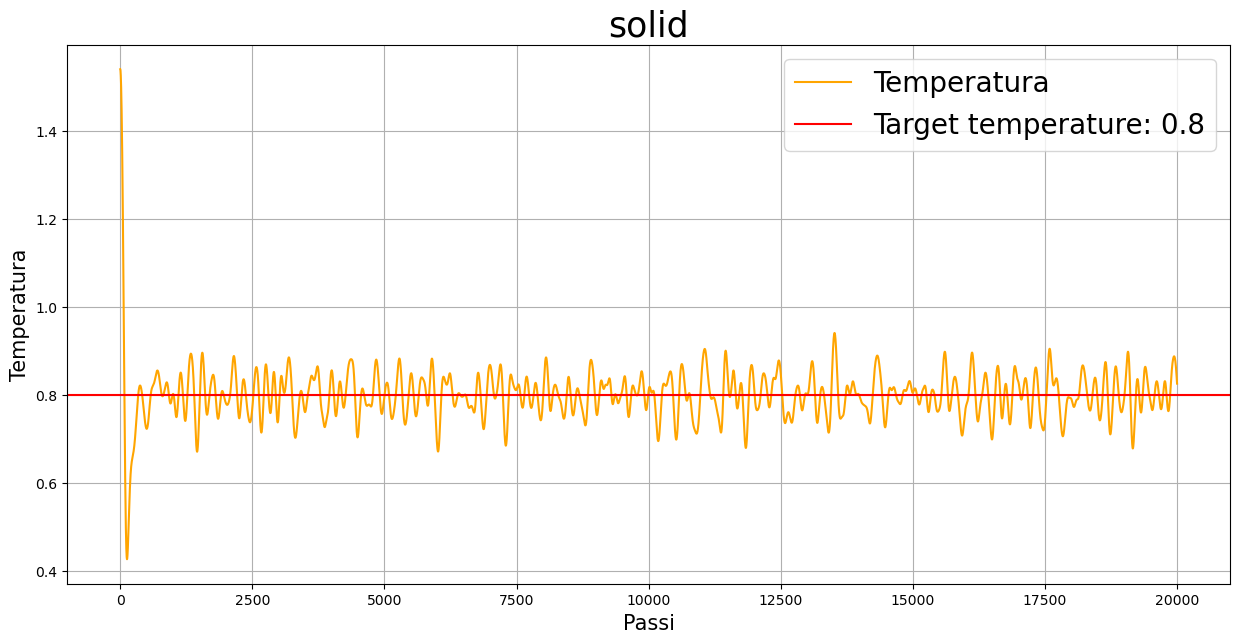

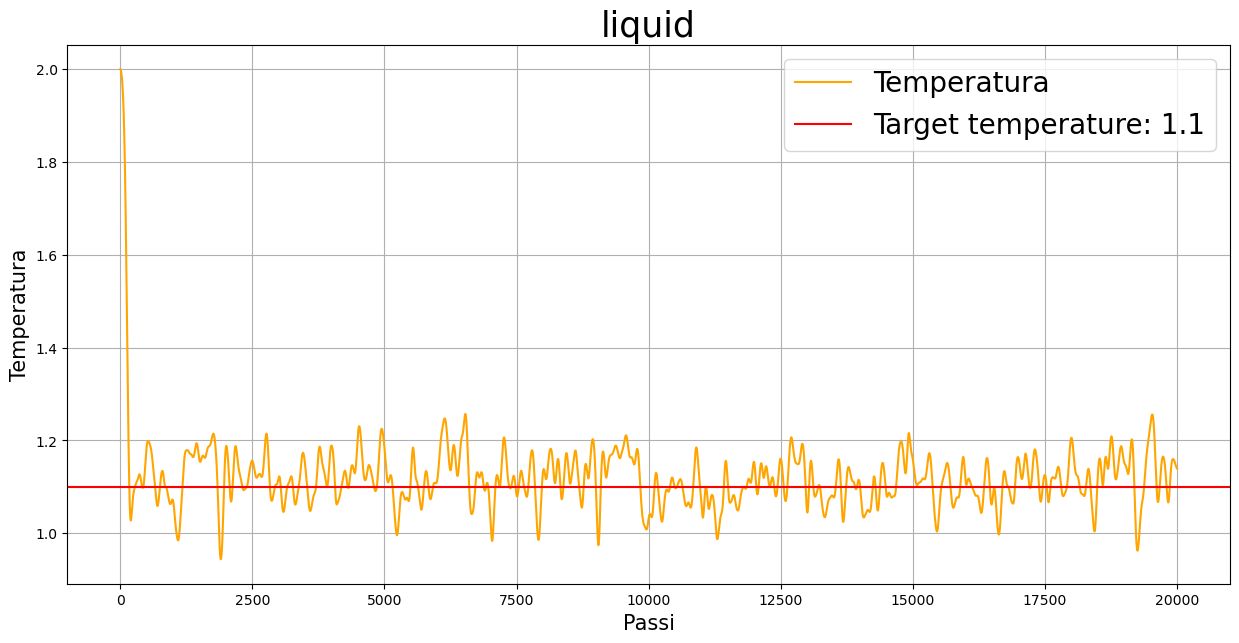

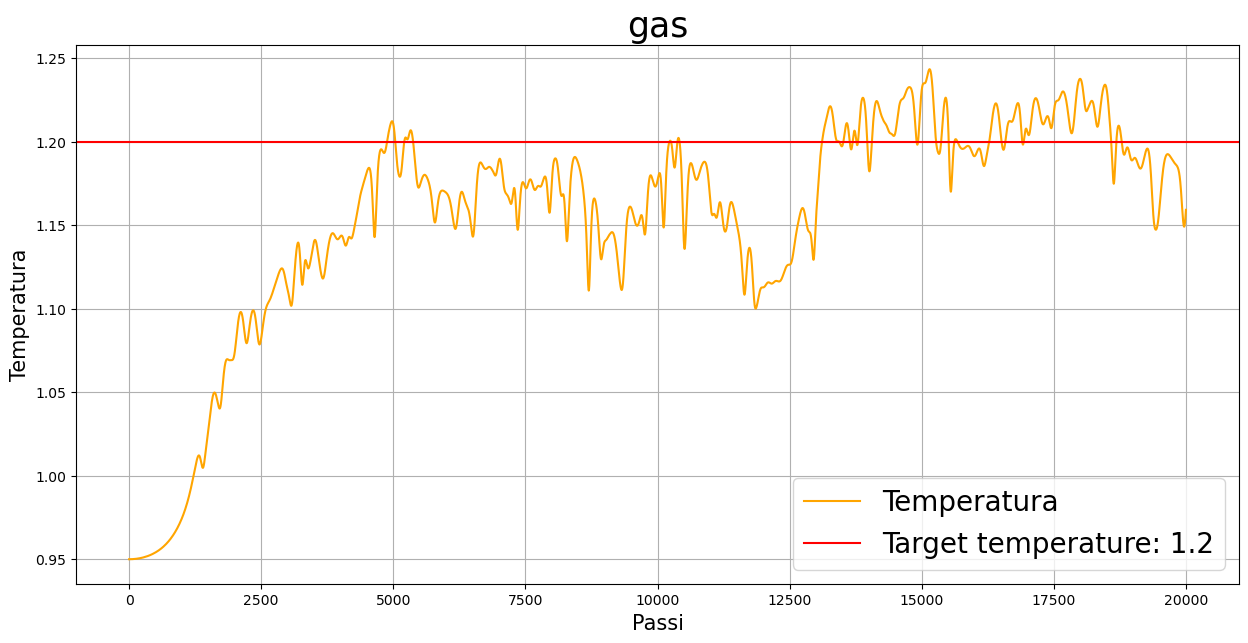

In [77]:
plotData('equilibrazione/',20000)

Si trova dunque:

| fase     | Solido   | Liquido  | Gas   |
|----------|----------|----------|-------|
|  $kT^*$  | 1.54     | 2.0      | 0.95  |




Ho trovato il valore iniziale di $T^*$ necessario per stabilizzare, il sistema dopo un certo numero di passaggi (tempo di equilibrazione). Imposto il valore medio di $T$ al valore desiderato $T^*$. Lancerò le simulazioni di Dinamica Molecolare di fase solida/liquida/gassosa in seguito a tale tempo di equilibrazione.

# Termalizzazione di un sistema di argon

Attraverso il codice aggiornato, ho eseguito simulazioni di dinamica molecolare di un modello di Lennard-Jones per l'Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) nelle seguenti condizioni:
1. fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (raggio di cutoff: $r_c = 2.2$)
2. fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (raggio di cutoff: $r_c = 2.5$)
3. fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (raggio di cutoff: $r_c = 5.0$)


do you want to execute this program:


->  [yes| No]:  yes


HO IMPOSTATO LA CONFIGURAZIONE INIZIALE
solid equilibrio con
SIMULATION_TYPE        0
RESTART                0
TEMP                   0.8
NPART                  108
RHO                    1.1
R_CUT                  2.2
DELTA                  0.0005
NBLOCKS                50
NSTEPS                 2000


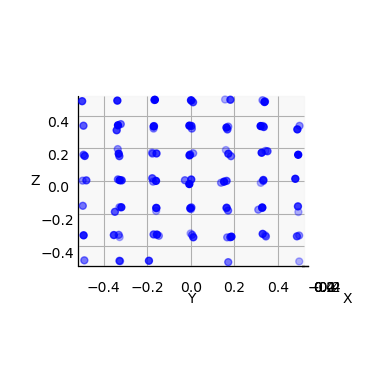

HO OTTENUTO LA CONFIGURAZIONE FINALE==== ] 98 %
solid


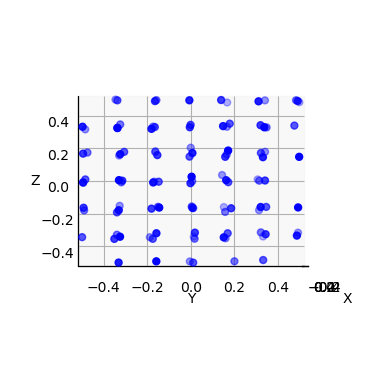

HO IMPOSTATO LA CONFIGURAZIONE INIZIALE
liquid equilibrio con
SIMULATION_TYPE        0
RESTART                0
TEMP                   1.1
NPART                  108
RHO                    0.8
R_CUT                  2.5
DELTA                  0.0005
NBLOCKS                50
NSTEPS                 2000


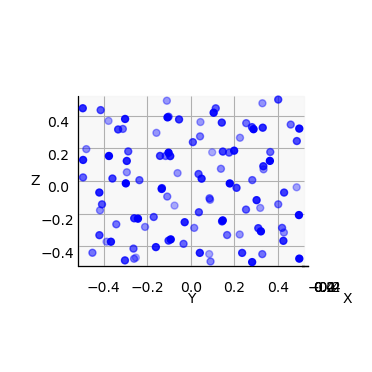

HO OTTENUTO LA CONFIGURAZIONE FINALE==== ] 98 %
liquid


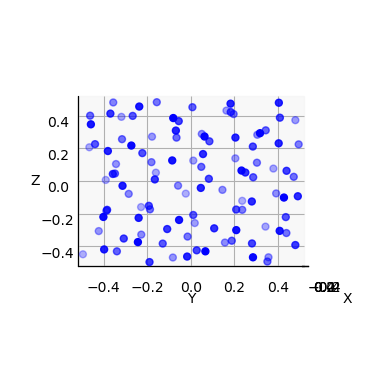

HO IMPOSTATO LA CONFIGURAZIONE INIZIALE
gas equilibrio con
SIMULATION_TYPE        0
RESTART                0
TEMP                   1.2
NPART                  108
RHO                    0.05
R_CUT                  5.0
DELTA                  0.0005
NBLOCKS                50
NSTEPS                 2000


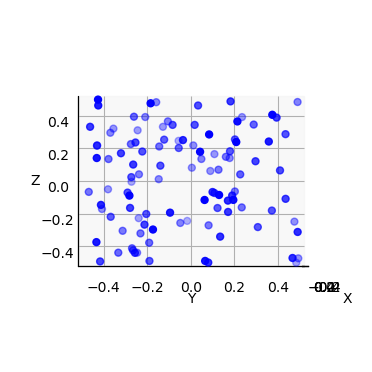

HO OTTENUTO LA CONFIGURAZIONE FINALE==== ] 98 %
gas


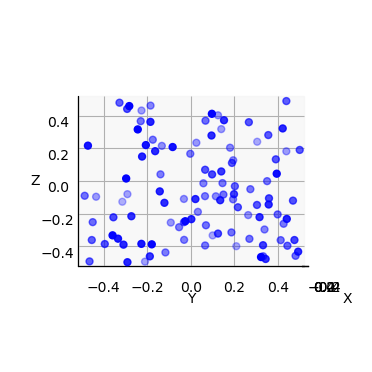

In [120]:
print('do you want to execute this program:')
answer = input('->  [yes| No]: ' )
if answer == 'yes' :
    for i in range (0,3) :
        setInitialConfig(phase[i],'equilibrazione/'+phase[i]+\
                         '/CONFIG/config.xyz',50,2000,False)
        runSimulation(phase[i],'argon/')

In [83]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

npart = 108

N = 50
x = np.arange(N)+1    # uso l'ordinamento da 1 a N

th_var = ["kinetic_energy", "potential_energy",\
          "total_energy", "pressure", "temperature"]
labels = [  "Kinetic en.\n(progr. average)",
            "Potential en.\n(progr. average)",
            "Total en.\n(progr. average)",
            "Pressure\n(progr. average)", 
            "Temperature\n(block average)",
            "Temperature\n(progr. average)"]
titles = [  "Kinetic energy",
            "Potential energy",
            "Total energy",
            "Pressure", 
            "Temperature",
            "Temperature"]
ylabels = ["K*/N", "U*/N", "E*/N", "p*", "T*", "T*"]
colors = ["r", "g", "b", "cyan", "darkorange"]

In [84]:
os.getcwd()
os.getcwd()

'/home/daniele/Documents/LSN/4-moleculardynamicsnve'

In [111]:
def plotFigures(fase):
    plt.figure(figsize=(21,12))
    plt.suptitle(fase+" phase", fontsize = 25)
    
    for i in range(0,5):
        
        plt.subplot(2,3,i+1)
        ave, ave_prog, err = np.loadtxt("argon/"+fase+"/"+th_var[i]+".dat",\
                            usecols=(1,2,3),  unpack='true')
        plt.errorbar(x, ave_prog, yerr = err, marker='o', label=labels[i], color = colors[i])
        plt.title(titles[i], fontweight='bold')
        plt.ylabel(ylabels[i])
        plt.xlabel('Block number')
        plt.xticks(np.arange(1,N+1,2))
        if(i==2):
            plt.ylim(ave_prog[-1]-err[2]*3, ave_prog[-1]+err[2]*3)

        plt.grid(True)
        plt.legend()
    
    plt.show()


Mosto grafici per i valori medi progressivi e le incertezze in funzione del numero crescente di blocchi per l'energia totale (interna) per particella, $E/N$, l'energia potenziale per particella, $U/N$, l'energia cinetica per particella, $K/N$, la temperatura, $T$, e la pressione, $P$, in unità ridotte.

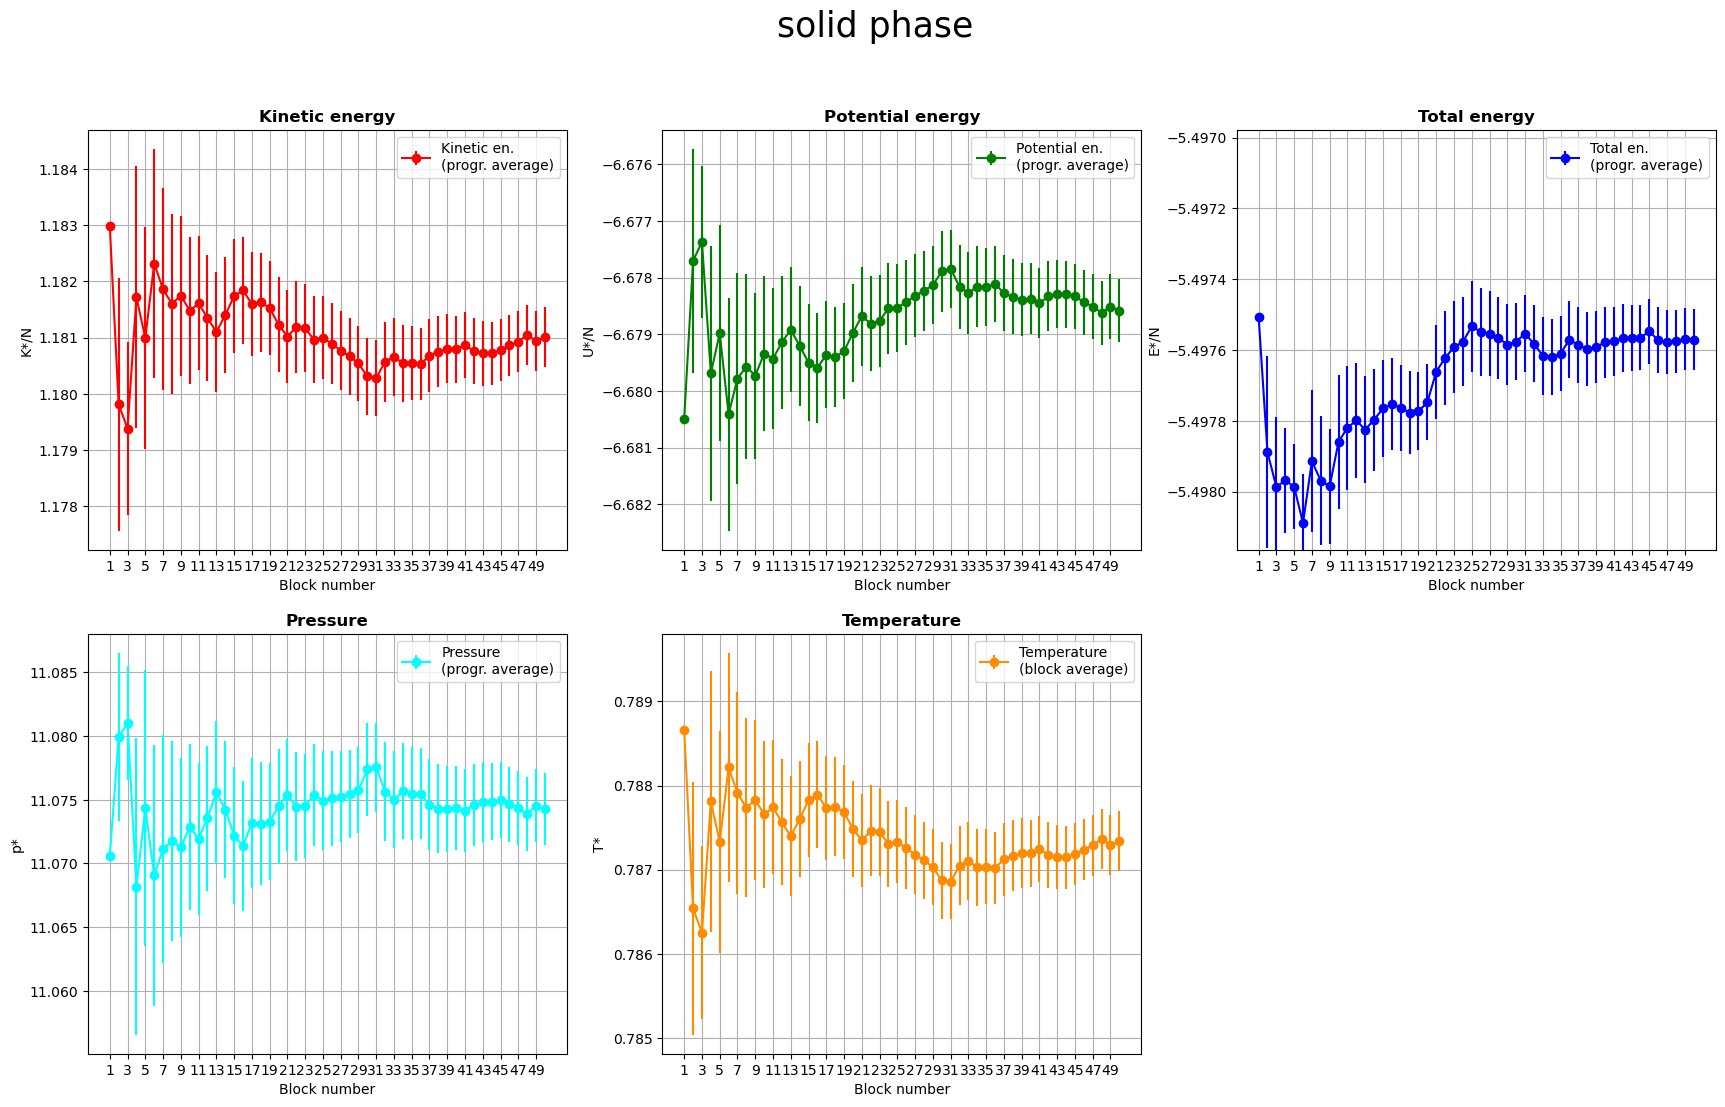

In [121]:
plotFigures("solid")

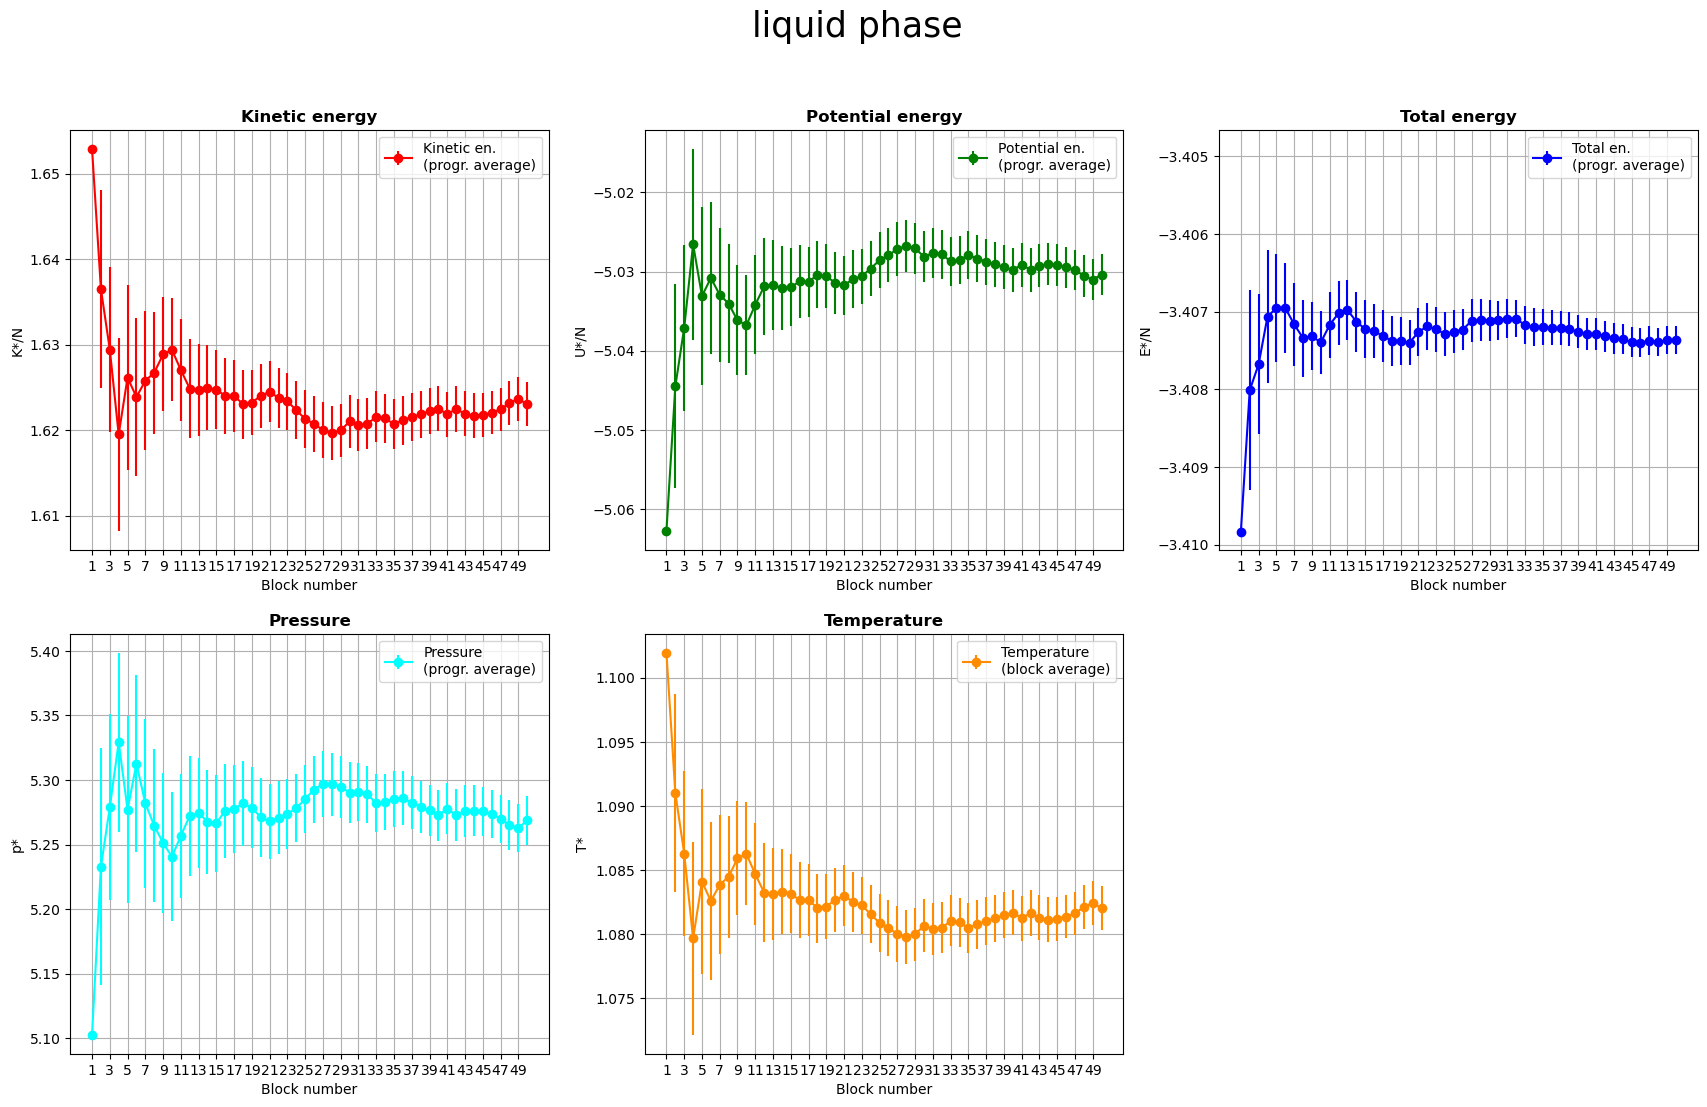

In [122]:
plotFigures("liquid")

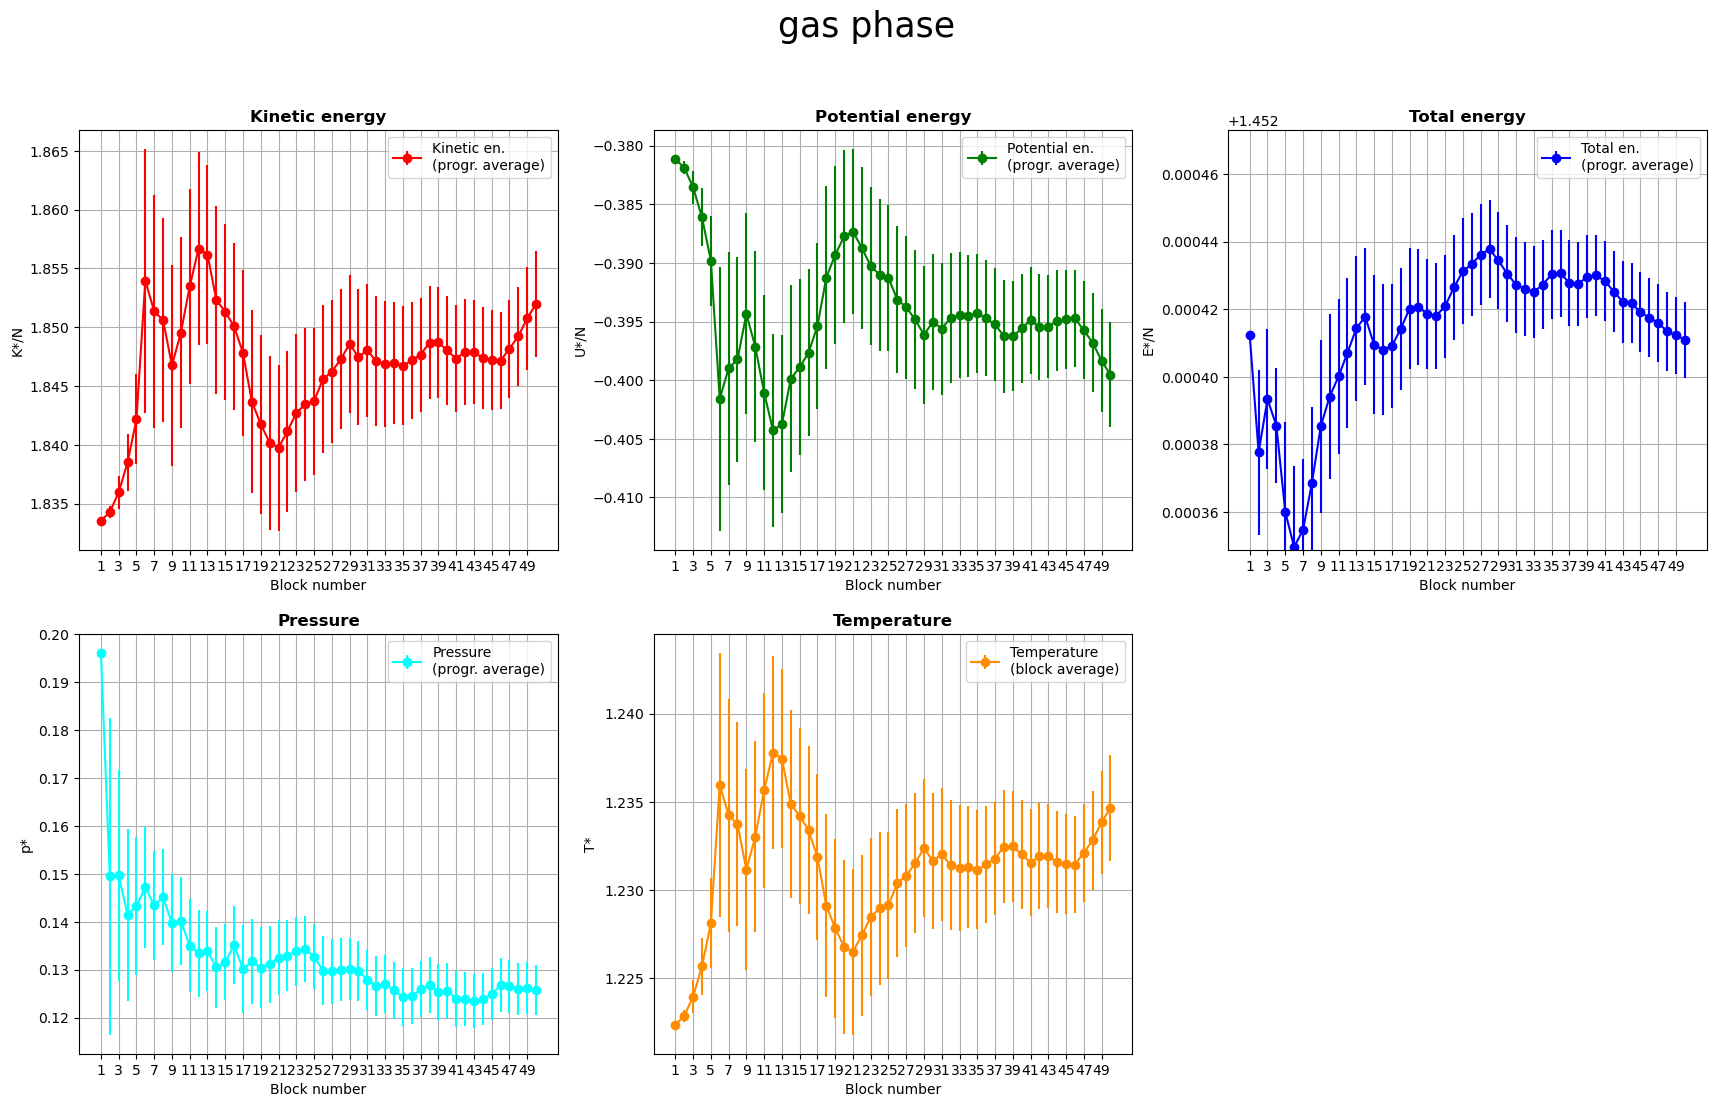

In [123]:
plotFigures("gas")

### Osservo che il sistema termalizza a temperature leggermente più basse, nelle fasi solida (0.787 invece che 0.8) e liquida (1.08 invece che 1.1), e leggermente più alte, nella fase gassosa (1.23 invece che 1.2), rispetto alla temperatura raggiunta durante l'equilibrazione. Una possibile spiegazione è che l'equilibrazione è avvenuta su tempi molto più brevi rispetto alla simulazione vera e propria. Pertanto è possibile che il sistema abbia ancora la possibilità di fluttuare rispetto al valore di equilibrio raggiunto, e dunque non termalizza esattamente alla temperatura indicata inizialmente.
### Osservo inoltre che l'andamento dell'energia cinetica proporzionale all'andamento della temperatura; il valore della pressione è proporzionale alla densità.

### I grafici dell'energia totale per particella sembrano fluttuare, in contrasto all'ipotesi della conservazione dell'enegia. Si nota però che queste oscillazioni avvengono su scala inferiore di un ordine di grandezza rispetto alle altre energie. D'altra parte, nel gas le interazioni sono molto rade, e quindi la redistribuzione dell'energia su tutti i gradi di libertà avviene su tempi molto più lunghi rispetto ad altre fasi più dense.


Il grafico dell'energia totale del gas soffriva di una precisione troppo bassa. Il grafico sembrava assumere un andamento discreto. Questo è stato risolto richiedendo un troncamento a cifre decimali più elevate, nel mio caso 12, impostando il comando setprecision(12).


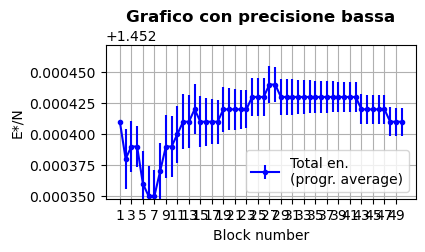

In [128]:
plt.figure(figsize=(4, 2))
ave, ave_prog, err = np.loadtxt("total_energy.dat",\
                            usecols=(1,2,3),  unpack='true')
plt.errorbar(x, ave_prog, yerr = err, marker='.', label=labels[i], color = colors[i])
plt.title("Grafico con precisione bassa", fontweight='bold')
plt.ylabel(ylabels[i])
plt.xlabel('Block number')
plt.xticks(np.arange(1,N+1,2))
if(i==2):
    plt.ylim(ave_prog[-1]-err[2]*3, ave_prog[-1]+err[2]*3)
plt.grid(True)
plt.legend()
plt.show()

# Calcolo della funzione di distribuzione a coppie

La funzione a due punti è una quantità strutturale di un liquido definita come
$$g^{(2)}(x,y)=\frac{\rho^{(2)}(x,y)}{\rho^{(1)}(x)\rho^{(1)}(y)}$$
dove $\rho^{(n)}$ è la densità a $n$ corpi, definita dall'integrale configurazionale del peso di Gibbs su tutti gli altri $N-n$ gradi di libertà:
$$\rho^{(1)}(x)=\frac{N}{Z}\int e^{-\beta~V(x,x_2,...,x_N)}~dx_2...dx_N$$
e dal momento che
\begin{eqnarray}
\langle\delta(x-x_1)\rangle)&=&\frac{1}{Z}\int\delta(x-x_1)e^{-\beta~V(x_1...x_N)}~dx_1...dx_N\\
&=&\frac{1}{Z}\int e^{-\beta~V(x,x_2,...x_N)}~dx_2...dx_N\end{eqnarray}
e pertanto
$$\rho^{(1)}(x)=\Bigg\langle\sum_{i=1}^N\delta(x-x_1)\Bigg\rangle$$
Similmente, per la dentità a due punti
$$\rho^{(2)}(x,y)=\frac{N(N-1)}{Z}\int e^{-\beta~V(x,y,x_3...x_N)}~dx_3...dx_N$$
e dal momento che
\begin{eqnarray}
\langle\delta(x-x_1)\delta(y-x_2)\rangle)
&=&\frac{1}{Z}\int e^{-\beta~V(x,y,x_3,...x_N)}~dx_3...dx_N\end{eqnarray}
e pertanto
$$\rho^{(1)}(x)=\Bigg\langle\sum_{j\neq i}\sum_{i=1}^N\delta(x-x_1)\delta(y-x_2)\Bigg\rangle$$

In un sistema omogeneo la funzione a due punti dipende solo dalla loro distanza. Per calcolare numericamente la $g(r)$, osservo che

\begin{eqnarray}
\Bigg\langle\frac{1}{N}\sum_i\sum_j\delta(x+x_j-x_i)\Bigg\rangle&=&
\Bigg\langle\frac{1}{N}\int\sum_i\sum_j\delta(x+x'-x_i)\delta(x'-x_j)dx'\Bigg\rangle\\
&=&\frac{1}{N}\int\rho^{(2)}(x+x',x')dx'\\
&=&\frac{1}{N}\int\rho^{(2)}(|x+x'-x'|)dx'\\
&=&\frac{\rho^{(2)}(|x|)}{\rho}\\
&=&\rho g(x)\end{eqnarray}
e pertanto
\begin{eqnarray}
g(x)&=&\frac{1}{\rho N}\Bigg\langle\sum_i\sum_j\delta(x-(x_i-x_j))\Bigg\rangle\\
&=&\langle g(x)\rangle\\
&=&\frac{1}{\rho N \Delta V(x)}\Bigg\langle\sum_i\sum_j\delta(|x|-|x_i-x_j|)\Bigg\rangle
\end{eqnarray}
dove $$\Delta V(x)=\frac{4\pi}{3}((x+dx)^3-x^3)$$
In pratica, nella simulazione si riempie un istogramma aumentando il bin di $2$ alla posizione $x$ quanto trovo due particelle la cui distanza reciproca è compresa tra $x$ ed $x+dx$. Alla fine della simulazione si normalizza l'istogramma con la quantità $\rho N\Delta V(x)$.


Ho implementato il calcolo della funzione di distribuzione radiale, $g(x)$, come funzione della distanza radiale $ x $ tra le particelle, con $ x $ in $\left[ 0; \frac{L}{2}\right] $, all'interno del codice del simulatore NSL, calcolando valore medio di $g(x)$ in ciascun blocco, valore medio finale di $ g(x) $ con incertezze statistiche in un file separato.

Ho suddiviso l'intervallo $[0,L/2]$ (dove $L=(\rho/N)^{-1/3}$ rappresenta la dimensione di un lato del box) in 100 intervalli al fine di rappresentare la funzione tramite un istogramma. Durante l'esecuzione del programma, vengono esaminate tutte le coppie di particelle, e quando due particelle vengono individuate a una distanza compresa all'interno di un intervallo $[r,r+dr]$, viene incrementato di $+2$ il contatore corrispondente a quel determinato intervallo. Infine, l'istogramma viene normalizzato dividendo il contenuto di tutti i bin per un fattore $\rho N \Delta V$ con $\Delta V=4/3\pi((r+dr)^3-r^3)$, dove $N$ rappresenta il numero totale di particelle e $\rho$ la densità. Su questi dati viene sempre fatta la media a blocchi che permette una stima di $g(r)$ con la relativa incertezza.
Il calcolo viene fatto con 50 blocchi da 2000 passi l'uno. 

do you want to execute this program:


->  [yes| No]:  yes


HO IMPOSTATO LA CONFIGURAZIONE INIZIALE
solid equilibrio con
SIMULATION_TYPE        0
RESTART                0
TEMP                   0.8
NPART                  108
RHO                    1.1
R_CUT                  2.2
DELTA                  0.0005
NBLOCKS                50
NSTEPS                 2000


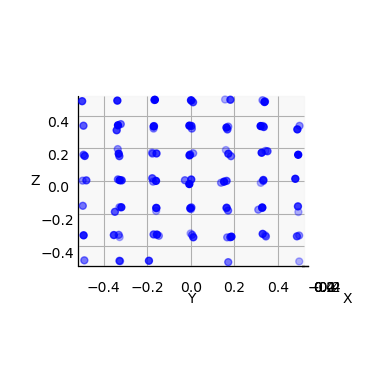

HO OTTENUTO LA CONFIGURAZIONE FINALE==== ] 98 %
solid


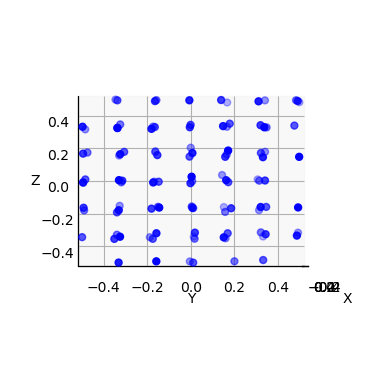

HO IMPOSTATO LA CONFIGURAZIONE INIZIALE
liquid equilibrio con
SIMULATION_TYPE        0
RESTART                0
TEMP                   1.1
NPART                  108
RHO                    0.8
R_CUT                  2.5
DELTA                  0.0005
NBLOCKS                50
NSTEPS                 2000


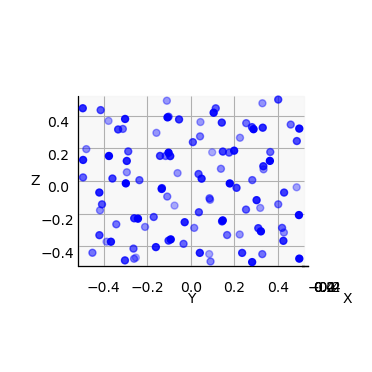

HO OTTENUTO LA CONFIGURAZIONE FINALE==== ] 98 %
liquid


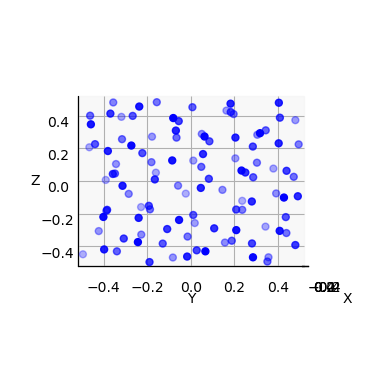

HO IMPOSTATO LA CONFIGURAZIONE INIZIALE
gas equilibrio con
SIMULATION_TYPE        0
RESTART                0
TEMP                   1.2
NPART                  108
RHO                    0.05
R_CUT                  5.0
DELTA                  0.0005
NBLOCKS                50
NSTEPS                 2000


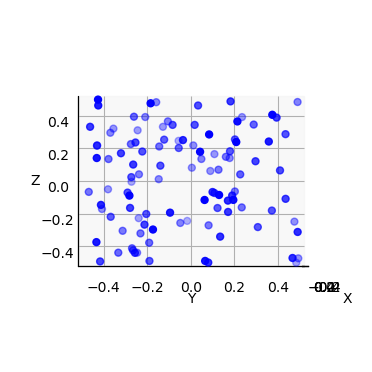

HO OTTENUTO LA CONFIGURAZIONE FINALE==== ] 98 %
gas


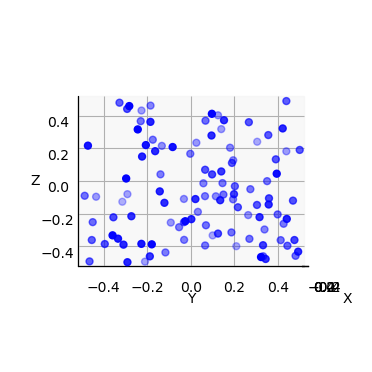

In [20]:

print('do you want to execute this program:')
answer = input('->  [yes| No]: ' )
if answer == 'yes' :
    for i in range (0,3) :
        setInitialConfig(phase[i],'equilibrazione/'+phase[i]+\
                         '/CONFIG/config.xyz',50,2000,0)
        runSimulation(phase[i],'distRadiale/')

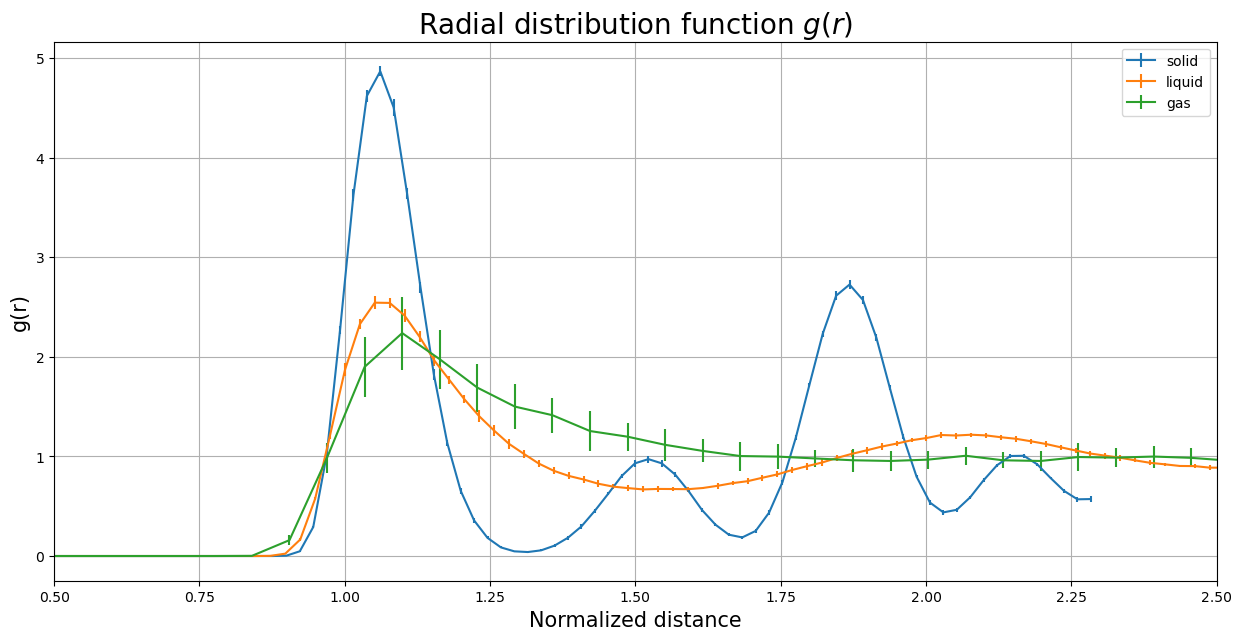

In [70]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

plt.figure(figsize=(15, 7))
x=np.arange(0,100)

# box scaling
rho = [1.1, 0.8, 0.05]
npart = 108
L = [0.0,0.0,0.0]
for i in range(3):
    L[i] = ((rho[i]/npart)**(-1/3))/200
    
for i in range (3):
        gdr = np.loadtxt("distRadiale/"+phase[i]+"/gofr.dat", usecols=range(0,100), unpack='true', max_rows=20)
        y = np.mean(gdr, axis=1)
        err = np.std(gdr, axis=1)
        plt.errorbar(x*L[i], y, err, marker='',label=phase[i] )
        plt.title("Radial distribution function $g(r)$", fontsize=20)
        plt.xlabel('Normalized distance', fontsize=15)
        plt.ylabel('g(r)', fontsize=15)
        plt.legend()
        plt.grid(True)
        plt.xlim(0.5,2.5)